In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
install('yfinance')

In [17]:
install('statsmodels')

In [18]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

# Stock Returns

In [4]:
data = yf.Ticker('TSLA')
price = data.history(period='1y') 

In [5]:
x = price['Close'].pct_change()

print(x)

Date
2021-01-28         NaN
2021-01-29   -0.050154
2021-02-01    0.058322
2021-02-02    0.039271
2021-02-03   -0.020738
                ...   
2022-01-21   -0.052566
2022-01-24   -0.014726
2022-01-25   -0.012473
2022-01-26    0.020699
2022-01-27   -0.115542
Name: Close, Length: 253, dtype: float64


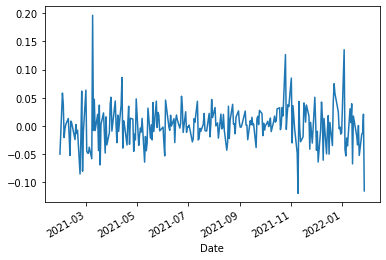

In [6]:
x.plot()

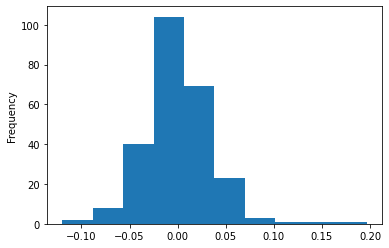

In [7]:
x.plot(kind='hist')

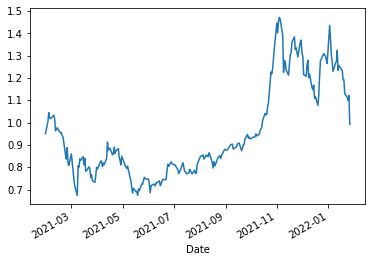

In [8]:
returns = (x + 1).cumprod()

returns.plot()

# Multiple Stocks

In [9]:
data = yf.download("AAPL MSFT TSLA", start='2021-01-01') 
x = data['Close'].pct_change()

print(x) 

[*********************100%***********************]  3 of 3 completed
                AAPL      MSFT      TSLA
Date                                    
2021-01-04       NaN       NaN       NaN
2021-01-05  0.012364  0.000965  0.007317
2021-01-06 -0.033662 -0.025929  0.028390
2021-01-07  0.034123  0.028457  0.079447
2021-01-08  0.008631  0.006093  0.078403
...              ...       ...       ...
2022-01-21 -0.012765 -0.018468 -0.052566
2022-01-24 -0.004864  0.001149 -0.014726
2022-01-25 -0.011385 -0.026588 -0.012473
2022-01-26 -0.000563  0.028493  0.020699
2022-01-27 -0.002943  0.010549 -0.115542

[270 rows x 3 columns]


In [10]:
print(x.describe()) 

             AAPL        MSFT        TSLA
count  269.000000  269.000000  269.000000
mean     0.000894    0.001285    0.001115
std      0.015699    0.013754    0.036074
min     -0.041674   -0.042323   -0.119903
25%     -0.008023   -0.005634   -0.018822
50%      0.000749    0.000681    0.001535
75%      0.011806    0.010267    0.019078
max      0.053851    0.042114    0.196412


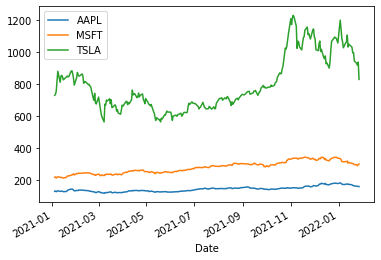

In [11]:
data['Close'].plot()

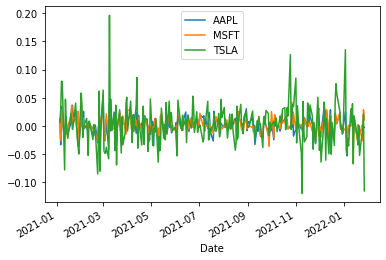

In [12]:
x = data['Close'].pct_change()
x.plot()

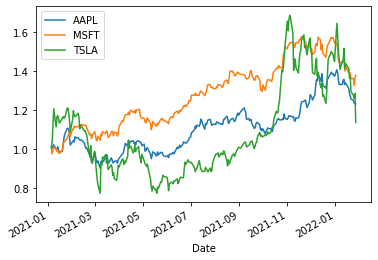

In [13]:
(x + 1).cumprod().plot()

# Stock Correlations

In [14]:
data = yf.download("FB AMZN AAPL NFLX GOOG", start='2020-01-01') 
x = data['Close'].pct_change()
corr = x.corr()
print(corr) 

[*********************100%***********************]  5 of 5 completed
          AAPL      AMZN        FB      GOOG      NFLX
AAPL  1.000000  0.670311  0.694182  0.698097  0.487087
AMZN  0.670311  1.000000  0.638013  0.654345  0.609311
FB    0.694182  0.638013  1.000000  0.736172  0.513857
GOOG  0.698097  0.654345  0.736172  1.000000  0.492646
NFLX  0.487087  0.609311  0.513857  0.492646  1.000000


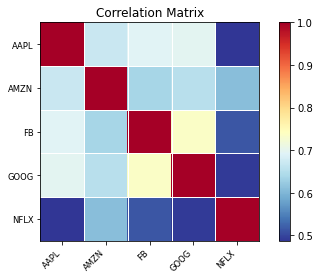

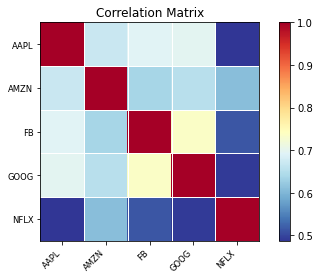

In [19]:
sm.graphics.plot_corr(corr, xnames=list(x.columns))

# Analyzing a Portfolio

In [23]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']
weights = [0.3, 0.2, 0.4, 0.1] 
data = yf.download(stocks, start='2021-01-01')

[*********************100%***********************]  4 of 4 completed


In [25]:
#daily returns
x = data['Close'].pct_change()

In [26]:
#portfolio return
ret = (x * weights).sum(axis = 1)

In [27]:
#total cumulative returns for our portfolio
cumulative = (ret + 1).cumprod() 

print(cumulative)

Date
2021-01-04    1.000000
2021-01-05    1.006828
2021-01-06    0.984063
2021-01-07    1.014647
2021-01-08    1.029021
                ...   
2022-01-21    1.236772
2022-01-24    1.237011
2022-01-25    1.210285
2022-01-26    1.224454
2022-01-27    1.215742
Length: 270, dtype: float64


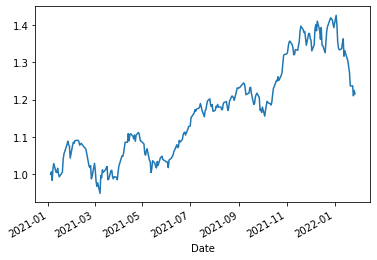

In [28]:
cumulative.plot()

In [29]:
print(np.std(ret))

0.013667580653831897


In [30]:
annual_std = np.std(ret) * np.sqrt(252)
print(annual_std)

0.21696611660374066


In [31]:
sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)

print(sharpe)

0.9492562794209303


# Loops

In [32]:
prices = [3, 5, 2, 8]
 
prod = 1
for p in prices:
  prod = prod * p

print(prod)

240


# Ranges

In [33]:
print(list(range(0, 10)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# Ranges and Loops

In [34]:
for i in range(0, 5):
   print("hello!") 

hello!
hello!
hello!
hello!
hello!


# Portfolio Optimization

In [35]:
stocks = ['AAPL', 'AMZN', 'MSFT', 'TSLA']

data = yf.download(stocks, start='2018-01-01')

#daily returns
data = data['Close']
x = data.pct_change()

print(x)

[*********************100%***********************]  4 of 4 completed
                AAPL      AMZN      MSFT      TSLA
Date                                              
2018-01-02       NaN       NaN       NaN       NaN
2018-01-03 -0.000174  0.012775  0.004654 -0.010233
2018-01-04  0.004645  0.004476  0.008801 -0.008290
2018-01-05  0.011385  0.016163  0.012398  0.006230
2018-01-08 -0.003714  0.014425  0.001020  0.062638
...              ...       ...       ...       ...
2022-01-21 -0.012765 -0.059502 -0.018468 -0.052566
2022-01-24 -0.004864  0.013327  0.001149 -0.014726
2022-01-25 -0.011385 -0.031534 -0.026588 -0.012473
2022-01-26 -0.000563 -0.007954  0.028493  0.020699
2022-01-27 -0.002943  0.005509  0.010549 -0.115542

[1026 rows x 4 columns]


In [36]:
wts = np.random.uniform(size = 4)
wts = wts/np.sum(wts) 

print(wts)

[0.41772949 0.34210986 0.09394654 0.14621412]


In [38]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = [] 

In [39]:
count = 500
for k in range(0, count):
   wts = np.random.uniform(size = len(x.columns))
   wts = wts/np.sum(wts)
   p_weights.append(wts)

   #returns
   mean_ret = (x.mean() * wts).sum()*252
   p_returns.append(mean_ret)

   #volatility
   ret = (x * wts).sum(axis = 1)
   annual_std = np.std(ret) * np.sqrt(252)
   p_risk.append(annual_std)
    
   #Sharpe ratio
   sharpe = (np.mean(ret) / np.std(ret))*np.sqrt(252)
   p_sharpe.append(sharpe)

In [40]:
max_ind = np.argmax(p_sharpe)

#Max Sharpe ratio
print(p_sharpe[max_ind])

#weights
print(p_weights[max_ind])

1.4802016280496355
[0.26213531 0.01689908 0.37050905 0.35045656]


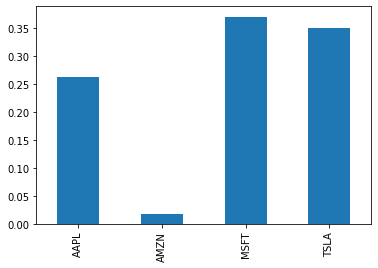

In [42]:
s = pd.Series(p_weights[max_ind], index=x.columns)
s.plot(kind='bar')

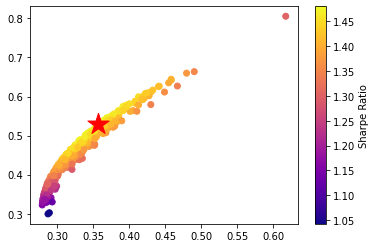

In [43]:
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.show()